In [54]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout
import numpy as np
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

np.random.seed(3)

(X_train, Y_train), (X_test_org, Y_test_org) = mnist.load_data()



In [55]:
X_val = X_train[18000:19000]
Y_val = Y_train[18000:19000]
X_train = X_train[12000:18000]
Y_train = Y_train[12000:18000]
X_test = X_test_org[3000:4000]
Y_test = Y_test_org[3000:4000]

X_train = X_train.reshape(6000, 28,28,1).astype('float32') / 255.0
X_val = X_val.reshape(1000, 28,28,1).astype('float32') / 255.0
X_test = X_test.reshape(1000, 28,28,1).astype('float32') / 255.0


In [56]:
Y_train = to_categorical(Y_train)
Y_val = to_categorical(Y_val)
Y_test = to_categorical(Y_test)

In [69]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()
hist = model.fit(X_train, Y_train, epochs=20, batch_size=20, validation_data=(X_val, Y_val))

print('Mean Accuracy: ',np.mean(hist.history['acc']))
print('Mean Loss: ',np.mean(hist.history['loss']))
print('Mean Val Accuracy: ',np.mean(hist.history['val_acc']))
print('Mean Val Loss: ',np.mean(hist.history['val_loss']))


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_27 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Train on 6000 samples, validate on 1000 samples
Epoch 1/25
6000/6000 [==============================] - 1s 147us/sample - loss: 0.5610 - acc: 0.8383 - val_loss: 0.2858 - val_acc: 0.9250
Epoch 2/25
6000/6000 [==============================] - 1s 102us/sample - loss: 0.2395 - acc: 0.9298 - val_loss: 0.2345 - val_acc: 0.9360
Epoch 3/25
6000/6000 [==============================]

1000/1000 [==============================] - 0s 69us/sample - loss: 0.2896 - acc: 0.9440
Test loss: 0.28964037696140166
Test accuracy: 0.944


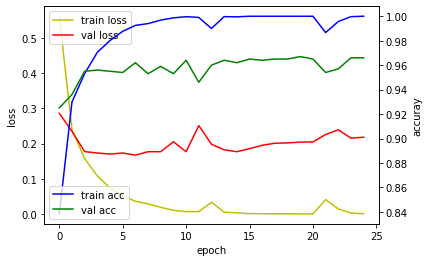

In [70]:
test_loss, test_acc = model.evaluate(X_test, Y_test, batch_size=10)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [71]:
(OX_train, OY_train), (OX_test, OY_test) = fashion_mnist.load_data()
OX_test = OX_test[:1000]
OY_test = OY_test[:1000]
OY_test = to_categorical(OY_test)
OX_test_reshape = OX_test.reshape(1000, 28,28,1).astype('float32') / 255.0
test_loss, test_acc = model.evaluate(OX_test_reshape, OY_test, batch_size=10)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)



1000/1000 [==============================] - 0s 58us/sample - loss: 26.4666 - acc: 0.1060
Test loss: 26.466568994522095
Test accuracy: 0.106


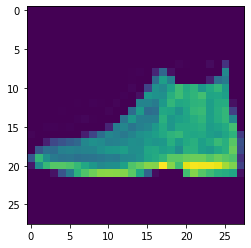

[2.1566151e-02 5.9780255e-03 1.8173137e-01 1.3877923e-02 3.1880310e-04
 1.3063835e-03 7.7280515e-01 1.6193769e-06 2.4114430e-03 3.1780878e-06]


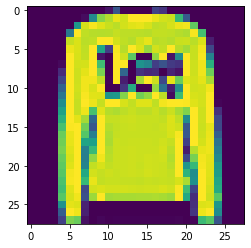

[6.8138629e-02 1.4102429e-03 1.9007530e-02 4.2610610e-04 2.5618842e-03
 2.3589263e-02 1.0830107e-02 3.9091702e-03 8.6201948e-01 8.1075868e-03]


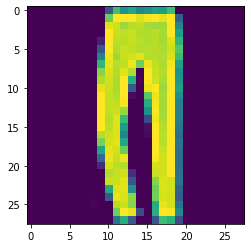

[8.6515397e-01 1.6417845e-04 1.5954752e-03 4.1900453e-06 5.8615636e-03
 4.0621305e-04 1.1778453e-02 1.1671688e-04 1.1488496e-01 3.4143224e-05]


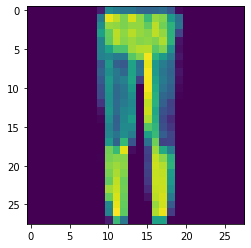

[0.02114451 0.28312078 0.03177615 0.00195684 0.01188563 0.00835954
 0.11408368 0.00977667 0.5158662  0.00203001]


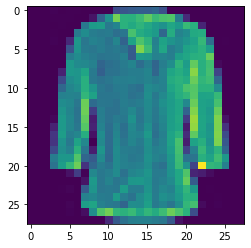

[0.22014171 0.0890963  0.06778303 0.02176911 0.18128076 0.02313105
 0.0963654  0.06782097 0.14961594 0.08299573]


In [28]:
predictions = model.predict(OX_test_reshape)
for i in range(5):
    plt.imshow(OX_test[i])
    plt.show()
    print(predictions[i])

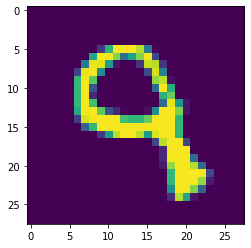

Original:  9
Predicted probabilities:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Predicted Y:  9


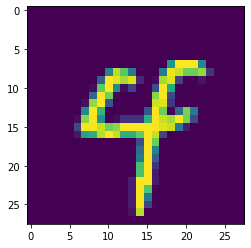

Original:  4
Predicted probabilities:  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Predicted Y:  4


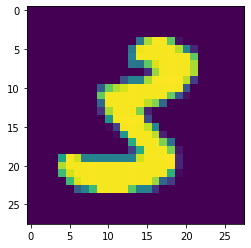

Original:  3
Predicted probabilities:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Predicted Y:  3


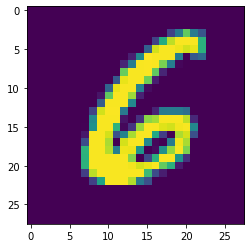

Original:  6
Predicted probabilities:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Predicted Y:  6


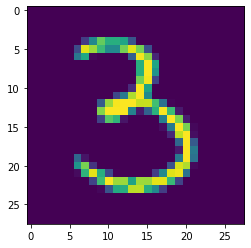

Original:  3
Predicted probabilities:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Predicted Y:  3


In [29]:
X_check = X_test_org[4000:5000]
X_check = X_check.reshape(1000,28,28,1)
Xpredictions = model.predict(X_check)

for i in range(4000,4005):
    plt.imshow(X_test_org[i])
    plt.show()
    print ("Original: ",Y_test_org[i])
    print("Predicted probabilities: ",Xpredictions[i-4000])
    print("Predicted Y: ",np.argmax(Xpredictions[i-4000]))